**Initialization** 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

General Initialization

In [0]:
def initialize(A,B,C,D,E,F,G,H):
  global a, b, c, d, e, f, g, h
  global psi
  #000
  a =np.sqrt(A)
  #001
  b = np.sqrt(B)
  #010
  c =np.sqrt(C)
  #011
  d = np.sqrt(D)
  #100
  e =np.sqrt(E)
  #101
  f = np.sqrt(F)
  #110
  g = np.sqrt(G)
  #111
  h =np.sqrt( H)
  #print(A,B,C,D,E,F,G,H)
  #print(a,b,c,d,e,f,g,h)
  
  

  psi = np.array([[a],[b],[c],[d],[e],[f],[g],[h]])
  #print(psi)


**The Hadamard** **Gate**

In [0]:
#Using Kronecker product to generate multiqubit Hadamard gates

H = (1/(np.sqrt(2))) * np.array([[1,1],[1,-1]])
#H = np.array([[1,1],[1,-1]])
I = np.identity(2,int)
H_I = np.kron(H,I)
I_H = np.kron(I,H)

H_I_I = np.kron(H_I,I)

I_H_I = np.kron(I_H,I)

I_I_H = np.kron(I,I_H)


#print("H_1 = \n",H_I_I)
#print("H_2 = \n",I_H_I)
#print("H_3 = \n",I_I_H)

**CNOT**

In [0]:
CNOT_23 = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])

CNOT_21 = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0]])


**Measurement**

In [0]:
def measurement(sampleSize):
  global aCounter
  global bCounter
  global cCounter
  global dCounter
  global eCounter
  global fCounter
  global gCounter
  global hCounter
  

  aCounter = 0
  bCounter = 0
  cCounter = 0
  dCounter = 0
  eCounter = 0
  fCounter = 0
  gCounter = 0
  hCounter = 0



  for i in range(1,sampleSize):
    r = np.random.uniform(0,1)
    
    q = (np.abs(a))**2
    if r < q:
      #print("000")
      aCounter += 1
      
    else:
      q = q + (np.abs(b))**2
      if r < q:
        #print("001")
        bCounter += 1
       
      else:
        q = q + (np.abs(c))**2
        if r < q:
          #print("010")
          cCounter += 1
         
        else:
          q = q + (np.abs(d))**2
          if r < q:
            #print("011")
            dCounter += 1
            
          else:
            q = q + (np.abs(e))**2
            if r < q:
              #print("100")
              eCounter += 1
           
            else:
              q = q + (np.abs(f))**2
              if r < q:
                #print("101")
                fCounter += 1
               
              else:
                q = q + (np.abs(g))**2
                if r < q:
                  #print("110")
                  gCounter += 1
                  
                else:
                  q = q + (np.abs(h))**2
                  if r < q:
                    #print("111")
                    hCounter += 1
                  
  


In [0]:
def plotHist(sampleSize):

  histData = [aCounter/sampleSize, bCounter/sampleSize, cCounter/sampleSize, dCounter/sampleSize, eCounter/sampleSize, fCounter/sampleSize, gCounter/sampleSize, hCounter/sampleSize]
  objects = ('000', '001', '010', '011', '100', '101','110','100')
  y_pos = np.arange(len(histData))
  #plt.figure(figsize=(15,8))
  plt.xticks(y_pos, objects)
  plt.ylabel('Probability')
  plt.xlabel('Quantum State')
  plt.title('Quantum State Measurement Probability')
  plt.bar(y_pos, histData, align='center', alpha=0.5)



**FIG 6 A - Entangled State**

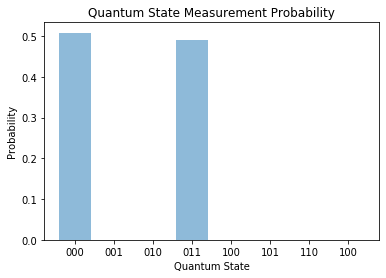

In [7]:
initialize(1,0,0,0,0,0,0,0)
psi_1 =  np.matmul(I_H_I,psi)
psi_new = np.matmul(CNOT_23,psi_1)


a = psi_new[0]
b = psi_new[1]
c = psi_new[2]
d = psi_new[3]
e = psi_new[4]
f = psi_new[5]
g = psi_new[6]
h = psi_new[7]


measurement(1000)
plotHist(1000) 

**FIG 6 B - Cat State**

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
[0.70710678] [0.] [0.] [0.] [0.] [0.] [0.] [0.70710678]


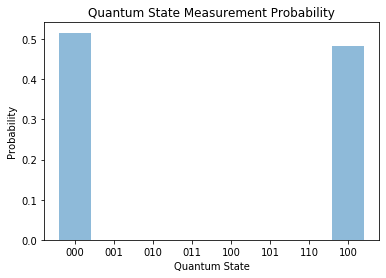

In [8]:
initialize(1,0,0,0,0,0,0,0)
psi_1 =  np.matmul(I_H_I,psi)
psi_2 = np.matmul(CNOT_23,psi_1)
psi_new = np.matmul(CNOT_21,psi_2)

print(a,b,c,d,e,f,g,h)
a = psi_new[0]
b = psi_new[1]
c = psi_new[2]
d = psi_new[3]
e = psi_new[4]
f = psi_new[5]
g = psi_new[6]
h = psi_new[7]
print(a,b,c,d,e,f,g,h)

measurement(1000)
plotHist(1000) 

**FIG 6 C - Unobserved Superposition**

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
[1.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]


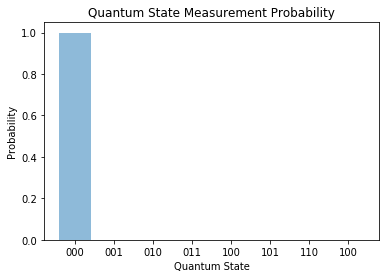

In [9]:
initialize(1,0,0,0,0,0,0,0)
psi_1 =  np.matmul(I_H_I,psi)
psi_new = np.matmul(I_H_I,psi_1)

print(a,b,c,d,e,f,g,h)
a = psi_new[0]
b = psi_new[1]
c = psi_new[2]
d = psi_new[3]
e = psi_new[4]
f = psi_new[5]
g = psi_new[6]
h = psi_new[7]
print(a,b,c,d,e,f,g,h)

measurement(1000)
plotHist(1000) 

**FIG 6 D - Observed Superposition**

1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
[0.5] [0.5] [0.5] [-0.5] [0.] [0.] [0.] [0.]


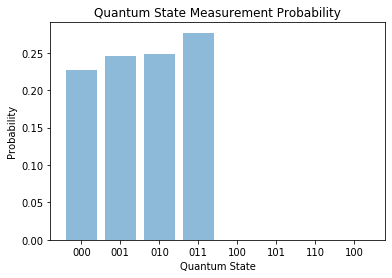

In [10]:
initialize(1,0,0,0,0,0,0,0)
psi_1 =  np.matmul(I_H_I,psi)
psi_2 = np.matmul(CNOT_23,psi_1)
psi_new = np.matmul(I_H_I,psi_2)

print(a,b,c,d,e,f,g,h)
a = psi_new[0]
b = psi_new[1]
c = psi_new[2]
d = psi_new[3]
e = psi_new[4]
f = psi_new[5]
g = psi_new[6]
h = psi_new[7]
print(a,b,c,d,e,f,g,h)

measurement(1000)
plotHist(1000) 